<a href="https://colab.research.google.com/github/ingridmacario/desafio-final-datagirls/blob/main/DataGirls_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Final - BOOTCAMP [RE]START DATA GIRLS

# Autoras:

*   Camila Mota;
*   Fatima Teixeira;
*   Ingrid Macário;
*   Jéssika Correa.



##**Resumo**

O **State of Data Brazil** é atualmente o maior e mais abrangente mapeamento do mercado de trabalho em dados no Brasil. Desde sua criação, a pesquisa tem se destacado como uma ferramenta fundamental para o entendimento das tendências e desafios enfrentados pelos profissionais dessa área. A quarta edição, realizada entre 16 de outubro e 6 de dezembro de 2023, representa um marco importante, consolidando a pesquisa como referência no setor de dados.

Com a participação de **5.293** profissionais brasileiros, esta edição trouxe uma visão ainda mais aprofundada sobre o perfil, as demandas e as expectativas desses profissionais, em um cenário que está em constante transformação.

Os participantes responderam a perguntas que exploravam aspectos essenciais como **perfil demográfico**, **formação acadêmica**, **áreas de atuação**, **nível de remuneração** e **rotatividade no setor**. Esses temas ajudam a mapear o contexto no qual os profissionais de dados estão inseridos, oferecendo insights valiosos para empresas e profissionais que buscam compreender melhor as dinâmicas do setor.

A edição 2023 trouxe novidades importantes, como a inclusão de perguntas sobre **Inteligência Artificial Generativa** e **Modelos de Linguagem de Grande Escala (LLMs)**. Esses tópicos refletem a crescente adoção dessas tecnologias no ambiente corporativo e o impacto que elas estão começando a ter no mercado de trabalho.

A realização da pesquisa State of Data Brazil é fruto de um esforço conjunto entre a **Data Hackers**, a maior comunidade de dados do Brasil, e a **Bain & Company**, uma das principais consultorias de gestão global.

Os resultados da pesquisa possuem acesso público, disponíveis na plataforma **Kaggle**.

[Source 1](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023?resource=download)

[Source 2](http://stateofdata.datahackers.com.br/)

[Source 3](https://www.datahackers.news/p/relatorio2023)

##**Objetivo**

O objetivo deste relatório, proposto pela [Re]start *Bootcamp* - Data Girls, é a condução de análises planejadas sobre o mercado de trabalho no setor de dados, utilizando como referência a base de dados '*State of Data Brazil* 2023'. Este estudo visa identificar tendências emergentes, avaliar a demanda por competências específicas, e compreender as dinâmicas do mercado, incluindo fatores como a oferta e a procura de profissionais qualificados, salários médios, e a evolução das funções e responsabilidades na área de dados. Este relatório faz parte do desafio final do *bootcamp* e visa aplicar os conhecimentos adquiridos, assim contribuindo para a formação das profissionais na área de dados.

Para início de análise, a função a seguir irá auxiliar na construção das legendas dos gráficos desta segunda parte.

In [ ]:
# Funções para legendar o gráfico

#Quantidade
def legenda_quant(grafico):
  for p in grafico.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height

    plt.text(x, y, f'{height:.2f}', ha='center', va='bottom')

# Porcentagem
def legenda_porc(grafico):
    total = sum([p.get_height() for p in grafico.patches])
    for p in grafico.patches:
        alt_bar = p.get_height()
        porcentagem = (alt_bar / total) * 100

        if alt_bar > 0:
          grafico.text(p.get_x() + p.get_width() / 2., alt_bar + 0.5, f'{porcentagem:.1f}%', ha='center', va='bottom', fontsize=8)

#**Dataset: limpeza e tratamento**

Este trabalho utilizou as bibliotecas **pandas**, **matplotlib** e **seaborn**.

O **pandas** é uma biblioteca essencial para a manipulação e análise de dados em Python, oferecendo estruturas de dados flexíveis e operações para trabalhar com tabelas de dados (DataFrames) e séries temporais. Ele facilita a limpeza, transformação e análise de dados, permitindo transferências como filtragem, agregação e integração de diferentes fontes de dados.

Enquanto, o **matplotlib** é uma biblioteca de visualização de dados que possibilita a criação de gráficos e plotagens altamente personalizáveis. É amplamente utilizado para gerar visualizações estáticas, animadas e interativas.

Por fim, o **seaborn** é uma biblioteca de visualização baseada no matplotlib que oferece uma interface de alto nível para a criação de gráficos estatísticos. Projetado para trabalhar de forma integrada com o pandas, o seaborn simplifica a geração de visualizações complexas, como mapas de calor, gráficos de dispersão com regressão e gráficos de violino. Ele facilita a análise de distribuições de dados e relações entre variações, fornecendo uma representação gráfica mais intuitiva dos dados.

A combinação dessas bibliotecas permite um fluxo de trabalho eficiente, desde a preparação dos dados até a criação de visualizações que facilitam a interpretação e comunicação dos resultados.

###Importando dataset

In [ ]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #biblioteca de suporte para melhorar a visualização dos dados
warnings.filterwarnings("ignore")

In [ ]:
# Carregar os dados
dataset = pd.read_csv('/content/State_of_data_BR_2023.csv')

In [ ]:
dataset.head() #visualiza as 5 primeiras linhas

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(5293, 399)

###Realização de checagem de valores duplicados por id

In [ ]:
# Verifica valores duplicados na coluna de id
dupCheck = dataset["('P0', 'id')"].duplicated()

duplicados = dataset[dupCheck]
print(duplicados)

Empty DataFrame
Columns: [('P0', 'id'), ('P1_a ', 'Idade'), ('P1_a_1 ', 'Faixa idade'), ('P1_b ', 'Genero'), ('P1_c ', 'Cor/raca/etnia'), ('P1_d ', 'PCD'), ('P1_e ', 'experiencia_profissional_prejudicada'), ('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada'), ('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia'), ('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero'), ('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD'), ('P1_f ', 'aspectos_prejudicados'), ('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas'), ('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência'), ('P1_f_3', 'Aprovação em processos seletivos/entrevistas'), ('P1_f_4', 'Oportunidades de progressão de carreira'), ('P1_f_5', 'Velocidade de progressão de carreira'), ('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho'), ('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias'), ('P1_f_8', 'Relação com out

O dataset não possui valores duplicados com relação a id, que representa cada participante da pesquisa. Sendo assim, considera-se que há 5293 participantes distintos.

###Refinamento do dataset

Visando melhor trabalhabilidade com o dataset, foi realizado alteração nos nomes das colunas do cabeçalho, com a remoção de caracteres indesejados, conforme célula abaixo.

In [ ]:
# Alterar o nome do cabecalho

novo_cabecalho = [col.strip("()").replace("'", "").split(', ')[1] for col in dataset.columns]
dataset.columns = novo_cabecalho

dataset = dataset.drop(columns=['id'])

dataset.head()

,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,Não acredito que minha experiência profissional seja afetada,Experiencia prejudicada devido a minha Cor Raça Etnia,Experiencia prejudicada devido a minha identidade de gênero,Experiencia prejudicada devido ao fato de ser PCD,...,Entrando em contato com os times de negócio para definição do problema,Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,Colocando modelos em produção,Cuidando da manutenção de modelos de Machine Learning já em produção,Realizando construções de dashboards em ferramentas de BI como PowerBI,Utilizando ferramentas avançadas de estatística como SAS,Criando e dando manutenção em ETLs,Criando e gerenciando soluções de Feature Store e cultura de MLOps.,Criando e mantendo a infra que meus modelos e soluções rodam (clusters,Treinando e aplicando LLMs para solucionar problemas de negócio.
0,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Listou-se, em ordem alfabética, as colunas do DataFrame para melhor conhecimento acerca do dataset trabalhado.

In [ ]:
lista_colunas = dataset.columns.tolist()
lista_colunas = sorted(lista_colunas)
for i in lista_colunas:
  print(i)

""Point and Click"" Analytics como Alteryx
.NET
A empresa que trabalho paga pelas soluções de AI Generativa com foco em produtividade
AI Generativa e LLMs para melhorar produtos externos
AI Generativa e LLMs para melhorar produtos externos para os clientes finais
AI Generativa e LLMs para melhorar produtos internos para os colaboradores
AI Generativa e LLMs para melhorar produtos internos para os colaboradores
AI Generativa é uma prioridade em sua empresa?
AWS Glue
AWS Glue
Alta direção da empresa não vê valor ou não vê como prioridade
Alteryx
Alteryx
Alteryx
Amazon Athena
Amazon Aurora ou RDS
Amazon Quicksight
Amazon Redshift
Amazon Web Services (AWS)
Ambiente e clima de trabalho
Ambientes de desenvolvimento local (R-studio
Ambientes de desenvolvimento na nuvem (Google Colab
Analista de Business Intelligence/BI
Analista de Dados/Data Analyst
Analytics Engineer
Apache Airflow
Apache Airflow
Apache NiFi
Apache NiFi
Apesar de ser gestor ainda atuo na parte técnica
Aprovação em processos 

A partir dessas informações, um novo dataset é gerado com apenas colunas selecionadas e que serão utilizadas nesta análise, que foram as seguintes:

* **Idade**: Idade dos participantes;
* **Genero**: Gênero dos participantes;
* **Cor/raca/etnia**: Cor, Raça ou Etnia dos participantes;
* **PCD**: Se o participante é portador de necessidade especiais;
* **Regiao onde mora**: Região aonde mora os participantes;**negrito**
* **Nivel de Ensino**: Grau de formação de cada participante;
* **Área de Formação**: Área de formação dos participantes;
* **Faixa salarial**: Indica a remuneração dos participantes;
* **Nivel**: Nível de experiência dos participantes;
* **Gestor?**: Indica se o participante atua como gestor;
* **Você está satisfeito na sua empresa atual?**: Grau de satisfação do participante na empresa em que trabalha;
* **Qual o principal motivo da sua insatisfação com a empresa atual?**: Motivo da insatisfação do participante na empresa em que trabalha;
* **Quais das linguagens listadas abaixo você utiliza no trabalho?**: Linguagens utilizada pelos participantes para trabalhar; e
* **Ferramenta de BI utilizada no dia a dia**: Ferramentas utilizada pelos participantes para trabalhar.

In [ ]:
dataset = dataset[['Idade', 'Genero', 'Cor/raca/etnia', 'PCD', 'Regiao onde mora', 'Nivel de Ensino', 'Área de Formação', 'Faixa salarial', 'Nivel', 'Gestor?', 'Você está satisfeito na sua empresa atual?','Qual o principal motivo da sua insatisfação com a empresa atual?', 'Quais das linguagens listadas abaixo você utiliza no trabalho?', 'Ferramenta de BI utilizada no dia a dia']]
dataset.head()


,Idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Faixa salarial,Nivel,Gestor?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Quais das linguagens listadas abaixo você utiliza no trabalho?,Ferramenta de BI utilizada no dia a dia
0,31,Masculino,Branca,Não,Sudeste,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,de R$ 12.001/mês a R$ 16.000/mês,Sênior,0.0,0.0,Trabalho presencial,"Python, SQL",Não utilizo nenhuma ferramenta de BI no trabalho
1,30,Masculino,Branca,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de R$ 6.001/mês a R$ 8.000/mês,Pleno,0.0,1.0,NaN,"SQL, Python","Looker, Microsoft PowerBI"
2,37,Feminino,Amarela,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de R$ 6.001/mês a R$ 8.000/mês,Júnior,0.0,1.0,NaN,"SQL, Python, SAS/Stata","Salesforce/Einstein Analytics, Amazon Quicksig..."
3,22,Masculino,Preta,Não,Sudeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,Masculino,Branca,Não,Sudeste,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,de R$ 4.001/mês a R$ 6.000/mês,Júnior,0.0,1.0,NaN,"SQL, Python","Microsoft PowerBI, Metabase"


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 14 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Idade                                                             5293 non-null   int64  
 1   Genero                                                            5293 non-null   object 
 2   Cor/raca/etnia                                                    5293 non-null   object 
 3   PCD                                                               5293 non-null   object 
 4   Regiao onde mora                                                  5169 non-null   object 
 5   Nivel de Ensino                                                   5293 non-null   object 
 6   Área de Formação                                                  5180 non-null   object 
 7   Faixa salarial                   

O salário é representado como uma faixa de valores. Portanto, foi necessário realizar a limpeza dos dados e separar as informações em duas colunas distintas: salário mínimo e salário máximo. Com base nessas colunas, foi possível calcular o salário médio, o que possibilitou a realização das análises relacionadas aos salários.

In [ ]:
# Faixa salarial

# Criar colunas para intervalo minimo e maximo na faixa salarial
# Funcao para converter a faixa salarial em intervalo numerico
def media_salarial(intervalo):
  #intervalo = intervalo.replace('de R$ ', '').replace('/mês a R$ ', '-').replace('/mês	','').replace('.', '')
  intervalo = str(intervalo)
  intervalo = intervalo.replace('de R$ ', '').replace('/mês', '').replace(' ', '').replace('.', '').replace('a', '-').replace('R$', '')

  try:
    lim_inf, lim_sup = map(int, intervalo.split('-'))
  except ValueError:
    return None, None   # retorna valor vazio quando ocorre um erro

  return lim_inf, lim_sup


dataset[['Salario minimo', 'Salario maximo']] = dataset['Faixa salarial'].apply(lambda x: pd.Series(media_salarial(x)))
dataset['Salario medio'] = (dataset['Salario minimo'] + dataset['Salario maximo'])/2


In [ ]:
dataset.head(3)

,Idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Faixa salarial,Nivel,Gestor?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Quais das linguagens listadas abaixo você utiliza no trabalho?,Ferramenta de BI utilizada no dia a dia,Salario minimo,Salario maximo,Salario medio
0,31,Masculino,Branca,Não,Sudeste,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,de R$ 12.001/mês a R$ 16.000/mês,Sênior,0.0,0.0,Trabalho presencial,"Python, SQL",Não utilizo nenhuma ferramenta de BI no trabalho,12001.0,16000.0,14000.5
1,30,Masculino,Branca,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de R$ 6.001/mês a R$ 8.000/mês,Pleno,0.0,1.0,NaN,"SQL, Python","Looker, Microsoft PowerBI",6001.0,8000.0,7000.5
2,37,Feminino,Amarela,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de R$ 6.001/mês a R$ 8.000/mês,Júnior,0.0,1.0,NaN,"SQL, Python, SAS/Stata","Salesforce/Einstein Analytics, Amazon Quicksig...",6001.0,8000.0,7000.5


###Verificação dos dados nulos:

In [ ]:
valores_nulos = (dataset.isnull().sum() / len(dataset)) * 100
valores_nulos = valores_nulos.round(2)
print(valores_nulos)

Idade                                                                0.00
Genero                                                               0.00
Cor/raca/etnia                                                       0.00
PCD                                                                  0.00
Regiao onde mora                                                     2.34
Nivel de Ensino                                                      0.00
Área de Formação                                                     2.13
Faixa salarial                                                      10.20
Nivel                                                               27.13
Gestor?                                                             10.20
Você está satisfeito na sua empresa atual?                          10.20
Qual o principal motivo da sua insatisfação com a empresa atual?    75.10
Quais das linguagens listadas abaixo você utiliza no trabalho?      28.74
Ferramenta de BI utilizada no dia a di

Tratamento de dados nulos:


*   Abaixo de 5%: dropa os nulos
*   5% a 20%: inputar categorias específicas para valores nulos
*   Acima de 20%: dropa toda coluna

Depois de uma avaliação das colunas, decidiu-se não dropar as colunas "Quais das linguagens listadas abaixo você utiliza no trabalho?" e "Ferramenta de BI utilizada no dia a dia", visto que são colunas fundamentais para responder uma das questões da análise.

Quanto a coluna de "Qual o principal motivo da sua insatisfação com a empresa atual?", apesar do grande volume de nulos, não foi excluída, pois é uma coluna condicional à "Você está satisfeito na sua empresa atual?". Logo, apenas quem respondeu a pergunta da satisfação como "NÃO" é quem teve direito de responder aos motivos para tal.






In [ ]:
# Tratamento de dados nulos

# Dropar os nulos
dataset = dataset.dropna(subset=['Regiao onde mora'], axis=0)
dataset = dataset.dropna(subset=['Área de Formação'], axis=0)

# Imputar as variaveis categoricas
dataset['Nivel'].fillna('Não respondeu', inplace=True)
dataset['Quais das linguagens listadas abaixo você utiliza no trabalho?'].fillna('Não respondeu', inplace=True)
dataset['Ferramenta de BI utilizada no dia a dia'].fillna('Não respondeu', inplace=True)

# Imputar as variaveis numericas - mediana
dataset['Gestor?'].fillna(0.0, inplace=True)
dataset['Você está satisfeito na sua empresa atual?'].fillna(dataset['Você está satisfeito na sua empresa atual?'].median(), inplace=True)


Para os valores nulos referentes ao salário médio, visando tomar a decisão de qual inputação os nulos deverão assumir (mediana ou média), optou-se por plotar o gráfico boxplot.

Após isso, optou-se por inputar os dados considerando a mediana, para não permitir que fosse afetado pelo outlier.

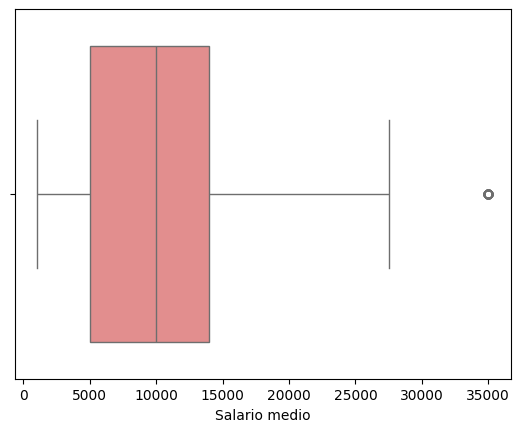

A média de salários é:  9933.799866131192
A mediana de salários é:  10000.5


In [ ]:
# Tratamento de nulos no salário médio
sns.boxplot(x=dataset['Salario medio'], color='lightcoral')
plt.show()

print("A média de salários é: ", dataset['Salario medio'].mean())
print("A mediana de salários é: ", dataset['Salario medio'].median())


dataset['Salario medio'].fillna(dataset['Salario medio'].median(), inplace=True)
dataset['Salario minimo'].fillna(dataset['Salario minimo'].median(), inplace=True)
dataset['Salario maximo'].fillna(dataset['Salario maximo'].median(), inplace=True)

Verificação final dos nulos:

In [ ]:
valores_nulos = (dataset.isnull().sum() / len(dataset)) * 100 #conta os valores nulos por coluna
valores_nulos = valores_nulos.round(2)
print(valores_nulos)

Idade                                                                0.00
Genero                                                               0.00
Cor/raca/etnia                                                       0.00
PCD                                                                  0.00
Regiao onde mora                                                     0.00
Nivel de Ensino                                                      0.00
Área de Formação                                                     0.00
Faixa salarial                                                       9.80
Nivel                                                                0.00
Gestor?                                                              0.00
Você está satisfeito na sua empresa atual?                           0.00
Qual o principal motivo da sua insatisfação com a empresa atual?    74.99
Quais das linguagens listadas abaixo você utiliza no trabalho?       0.00
Ferramenta de BI utilizada no dia a di

#**Parte 1: Panorama Geral**

###1. Qual o perfil sociodemográfico dos profissionais da área?

A análise a seguir foi realizada para entender como as idades desses profissionais da área de dados estão distribuídas, ou seja, qual é a idade mais comum, se há mais pessoas jovens ou mais velhas e qual a variação entre elas.  

Escolhemos um gráfico de distribuição de idades, onde:

* O eixo horizontal tem relação com as idades;
* O eixo vertical nos mostra a quantidade de pessoas;
* A curva mais escura sobreposta ao gráfico é chamada de kernel density estimation (KDE);
* As colunas representam a quantidade de pessoas que estão agrupadas em relação aquela faixa de idade.

A **KDE**, é uma técnica estatística de aprendizado de máquina usada para estimar a função de densidade de probabilidade, a curva nos ajuda a suavizar estes dados do histograma (as barras) para entender melhor a tendência geral dos dados nos dando uma compreensão mais intuitiva. Uma abordagem flexível para entender a distribuição de pontos de dados em um conjunto de dados.

Vemos então, após analisar o gráfico, que a idade média desses profissionais é de aproximadamente 32 anos, a pessoa mais velha possui 73 anos e a mais nova 18 anos. É um grupo com uma grande variedade de idades mas que se concentram em torno dos 30 anos.


Idade média: 31.95021730541288
Idade máxima: 73
Idade mínima: 18


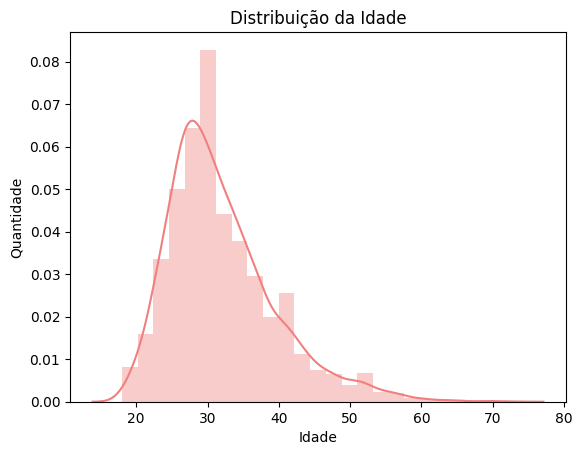

In [ ]:
#Análise das idades dos profissionais
print("Idade média:", dataset['Idade'].mean())
print("Idade máxima:", dataset['Idade'].max())
print("Idade mínima:", dataset['Idade'].min())


sns.distplot(dataset['Idade'], kde=True, bins=25, color='lightcoral')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

Neste ponto analisamos a distribuição de gêneros dos profissionais neste conjunto de dados, optamos por usar um gráfico de barras. Onde:
*   No eixo X (horizontal) representa as categorias **"Masculino", "Feminino", "Prefiro não informar" e "Outro";**
*   No eixo Y ( vertical) está representado a quantidade de pessoas.

A maioria dos profissionais identificados são do gênero masculino, correspondendo a **74,9%** do total.
**24,6%** do profissionais são femininos.
Uma pequena parte, **0,3%**, prefere não informar o gênero, enquanto **0,2%** se identificam como "outro".

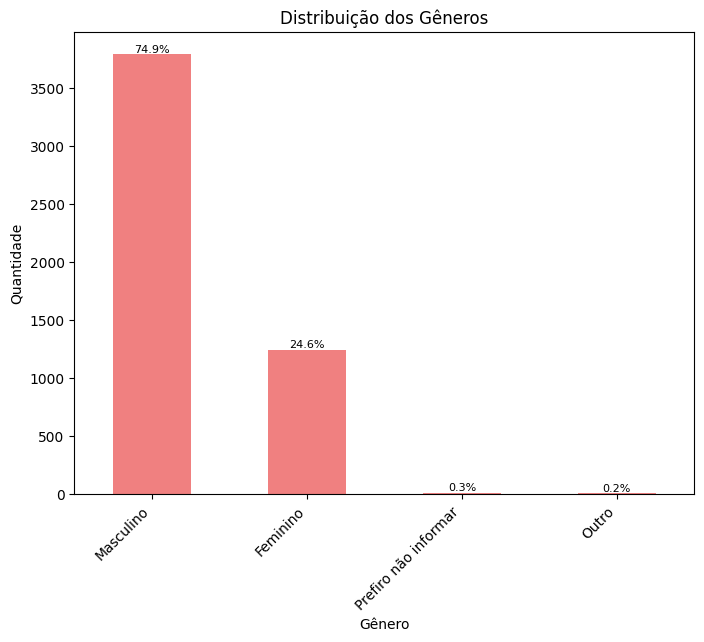

In [ ]:
#Análise dos gêneros dos profissionais
plt.figure(figsize=(8, 6))
grafico = dataset["Genero"].value_counts().plot(kind='bar', color = 'lightcoral' )
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Gêneros')
plt.xticks(rotation=45, ha='right')

# Função para adicionar porcentagem
legenda_porc(grafico)

plt.show()

A seguir fizemos uma análise da variável Cor/Raça/Etnia para entender a distribuição da cor, raça e etinia dos profissionais deste dataset. Criamos um gráfico de barras que representa essa distribuição. Ele mostra que a maioria das pessoas se identificam como brancas, seguida por uma quantidade significativa de pessoas que se identifficam como pardas. As outras categorias são menos representadas, uma pequena quantidade de pessoas preferiram não informar sua cor, raça ou etnia.
Essa análise serve para sabermos se um grupo de pessoas é diverso ou não. Com essa informação, podemos criar soluções para incluir e representar grupos étnicos diferentes, caso seja necessário.
Explicando o que o gráfico mostra:

*   No eixo X (horizontal) mostra as diferentes  categorias de cor, raça e etnia, como **"Branca" com 34,5%, "Parda" com 24,3%, "Preta" com 7,3%, "Amarela" com 2,8 %, entre outras**;
*   No eixo Y (vertical), temos o número de pessoas em cada uma dessas categorias.

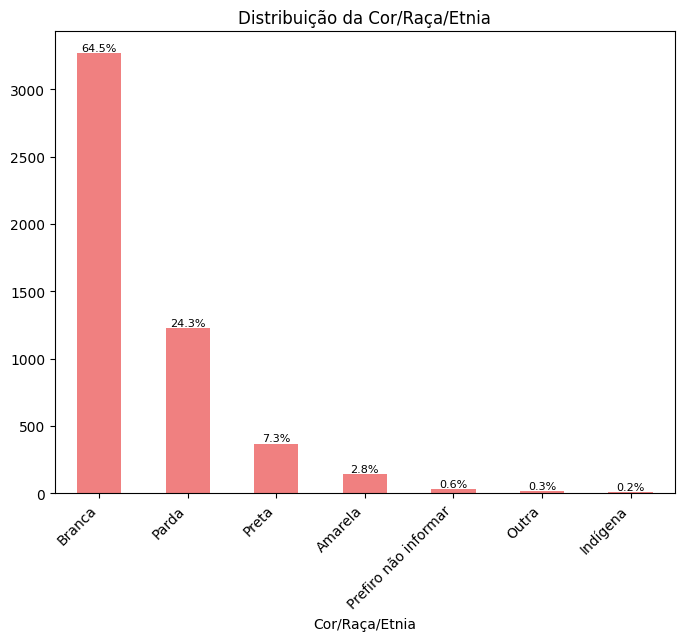

In [ ]:
# Analise da cor/raca/etnia dos profisssionais
#cor_unicos = dataset["Cor/raca/etnia"].unique()
#print(cor_unicos)
plt.figure(figsize=(8, 6))
grafico = dataset["Cor/raca/etnia"].value_counts().plot(kind='bar', color ='lightcoral')
plt.title('Distribuição da Cor/Raça/Etnia')
plt.xlabel('Cor/Raça/Etnia')
plt.xticks(rotation=45, ha='right')

# Função para adicionar porcentagem
legenda_porc(grafico)

plt.show()


O gráfico mostra a distribuição de pessoas que se declaram como pessoas com deficiência **(PCD)**. A grande maioria **(97,4%)** respondeu que não se considera PCD, enquanto uma pequena parcela **(2,1%)** respondeu sim. Um número ainda menor **(0,5%)** preferiu não responder à pergunta. A presença desse grupo que preferiu não se manifestar sugere que o tema pode ser sensível ou pouco compreendido. Mesmo com uma quantidade reduzida de PCDs no grupo, a importância de promover inclusão e acessibilidade se destaca, bem como a necessidade de maior conscientização sobre as demandas dessa categoria no ambiente profissional.

PCD
Não                     97.412090
Sim                      2.113789
Prefiro não informar     0.474121
Name: proportion, dtype: float64


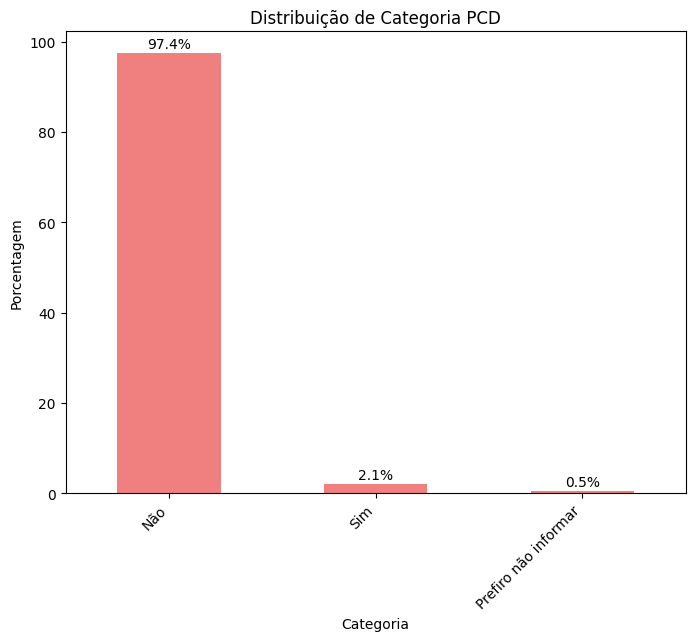

In [ ]:
# Análise da inclusão de profissionais PCDs
pcd = dataset['PCD'].value_counts(normalize=True)*100
print(pcd)

plt.figure(figsize=(8,6))
#pcd = sns.barplot(x=)
pcd = pcd.plot(kind='bar', color = 'lightcoral' )
plt.title('Distribuição de Categoria PCD')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')

for p in pcd.patches:
  alt_bar = p.get_height()
  pcd.text(p.get_x() + p.get_width() / 2., alt_bar + 0.5, f'{alt_bar:.1f}%', ha='center', va='bottom')

plt.show()

###2. Qual é a remuneração dos profissionais?

Escolhemos um histograma para visualizar como os salários dos profissionais estão distribuídos neste dataset, este agrupa os salários em intervalos (ou faixas) e mostra quantas pessoas recebem o salário em uma determinada faixa, a linha mais escura sobrepondo as colunas serve para visualizar melhor a tendência dos dados.  

*   O eixo X (horizontal) representa os diferentes níveis de salário;
*   O eixo Y (vertical) mostra quantos profissionais recebem cada intervalo de salário.

A maioria dos profissionais recebem entre 5.000,00 a 15.000,00 reais. O pico mais alto no gráfico mostra que uma maioria recebe um salário médio de 10.000,00 reais. Notamos uma queda no número de pessoas que recebem salários mais altos, salários acima de 25.000,00 reais se tornam mais raros representando uma pequena parcela de pessoas as quais atingiram uma faixa mais alta de remuneração.



In [ ]:
dataset['Salario medio'].describe()

,Salario medio
count,5062.000000
mean,9941.442315
std,6434.583306
min,1050.500000
25%,5000.500000
50%,10000.500000
75%,14000.500000
max,35000.500000


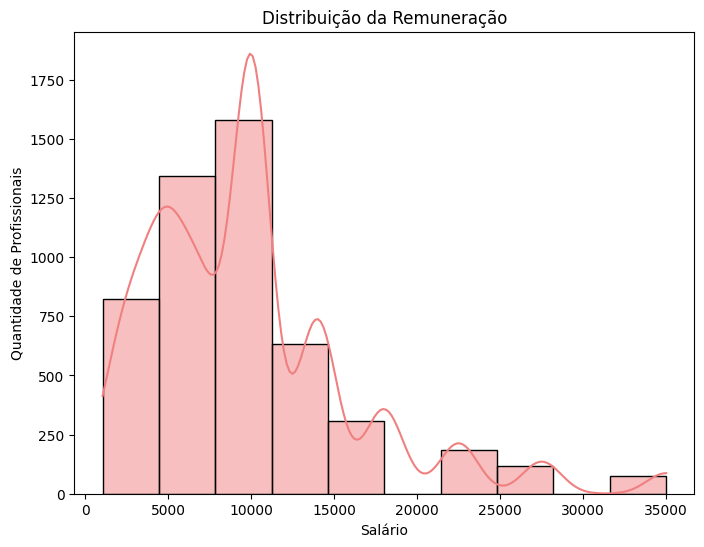

In [ ]:
# Media de salario
faixa_salarial = dataset['Salario medio']
plt.figure(figsize=(8, 6))
sns.histplot(faixa_salarial, bins=10, kde=True, color='lightcoral')
#plt.xlim(500, 30000)  # Intervalo do eixo x (mínimo 2, máximo 8)
#plt.ylim(-0.5, 0.5)
plt.title('Distribuição da Remuneração')
plt.xlabel('Salário')
plt.ylabel('Quantidade de Profissionais')

plt.show()


#media_salario_nivel = salario_nivel.groupby('Nivel')['Salario medio'].describe()
#media_salario_nivel


###3. Quantos profissionais estão em cada nível (junior, pleno, sênior e gestor)

Com o mercado em crescimento, necessita-se saber como está a distribuição dos profissionais dentro desse campo. Os dados nos contam uma história de um mercado equilibrado, mas com algumas nuances que podem impactar o futuro.

In [ ]:
nivel = dataset['Nivel']
nivel = round(nivel.value_counts(normalize=True)*100, 2)



| **Nível**     |   %   |
|---------------|:-----:|
|     Sênior    | 27.04 |
| Não Respondeu | 26.65 |
|     Pleno     | 26.50 |
|     Junior    | 19.81 |

No topo, temos os profissionais **Sêniores**, representando 27.04% da força de trabalho. Eles são os pilares do time de dados, trazendo expertise e liderando projetos críticos.

Em seguida, temos uma fatia curiosa: **Não Respondeu**, com 26.65%. Esse grupo chama a atenção por sua falta de informação, o que pode indicar uma área de investigação futura. Pode ser que essa parcela seja composta por freelancers, consultores, ou mesmo profissionais de outras áreas que estão migrando para dados, mas que ainda não se identificam em um nível específico.

Logo atrás, quase empatados, estão os profissionais **Plenos**, com 26.50%. Eles são a espinha dorsal das operações, já com um bom tempo de carreira, mas ainda em ascensão.

Por fim, temos os **Júniores**, que representam 19.81%. Eles são os novatos no campo, muitas vezes recém-formados ou em transição de carreira.

Agora, mergulhando na estrutura de gestão, o cenário revela um foco predominante na execução técnica.

In [ ]:
gestor = dataset['Gestor?'].replace({1: 'Sim', 0: 'Não'})
gestor = round(gestor.value_counts(normalize=True)*100, 2)

| **Gestor?** |   %   |
|-------------|:-----:|
|     Não     | 83.15 |
|     Sim     | 16.85 |

Com uma impressionante maioria de 83.15%, os profissionais **não** são gestores. Este dado revela um cenário onde a grande maioria está focada nas tarefas técnicas e operacionais. Para esses profissionais, o foco está em aprofundar habilidades técnicas e contribuir diretamente para o avanço da análise de dados.

Em contraste, apenas 16.85% dos profissionais ocupam cargos de gestão. Esse grupo representa uma minoria, mas desempenha um papel crucial. Esses gestores são responsáveis por coordenar equipes, tomar decisões estratégicas e garantir que as operações estejam alinhadas com os objetivos da empresa.

Ao combinar essas duas perspectivas, vemos um cenário onde a especialização técnica é amplamente valorizada, mas as oportunidades de gestão são limitadas.

###4. Os profissionais da área estão satisfeitos?

Em um setor de dados em constante evolução, a satisfação dos profissionais pode oferecer uma visão reveladora sobre o ambiente de trabalho e as áreas que precisam de atenção. A primeira etapa inclui a conversão de valores da coluna 'Você está satisfeito na sua empresa atual?' de numéricos para categóricos para então realização da contagem para a plotagem de resultados.

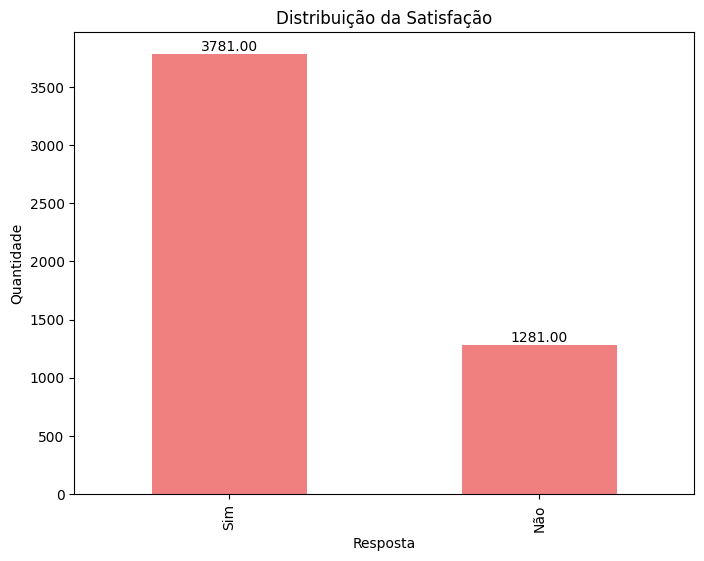

In [ ]:
satisfacao = dataset['Você está satisfeito na sua empresa atual?'].replace({1: 'Sim', 0: 'Não'})
satisfacao = satisfacao.value_counts()

plt.figure(figsize=(8,6))
satisfacao = satisfacao.plot(kind='bar', color = 'lightcoral')

for p in satisfacao.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height

    plt.text(x, y, f'{height:.2f}', ha='center', va='bottom')

plt.title('Distribuição da Satisfação')
plt.xlabel('Resposta')
plt.ylabel('Quantidade')

plt.show()

Uma perspectiva geral de satisfação: **3781** profissionais estão satisfeitos com sua situação atual, enquanto **1281** estão insatisfeitos. A maioria está satisfeita, o que sugere que, para muitos, o setor de dados é um ambiente positivo e gratificante.

No entanto, a quantidade considerável de insatisfeitos não pode ser ignorada e destaca áreas que precisam ser abordadas. Realizando um processo similar ao anterior, investigamos a fundo os principais motivos para insatisfação.

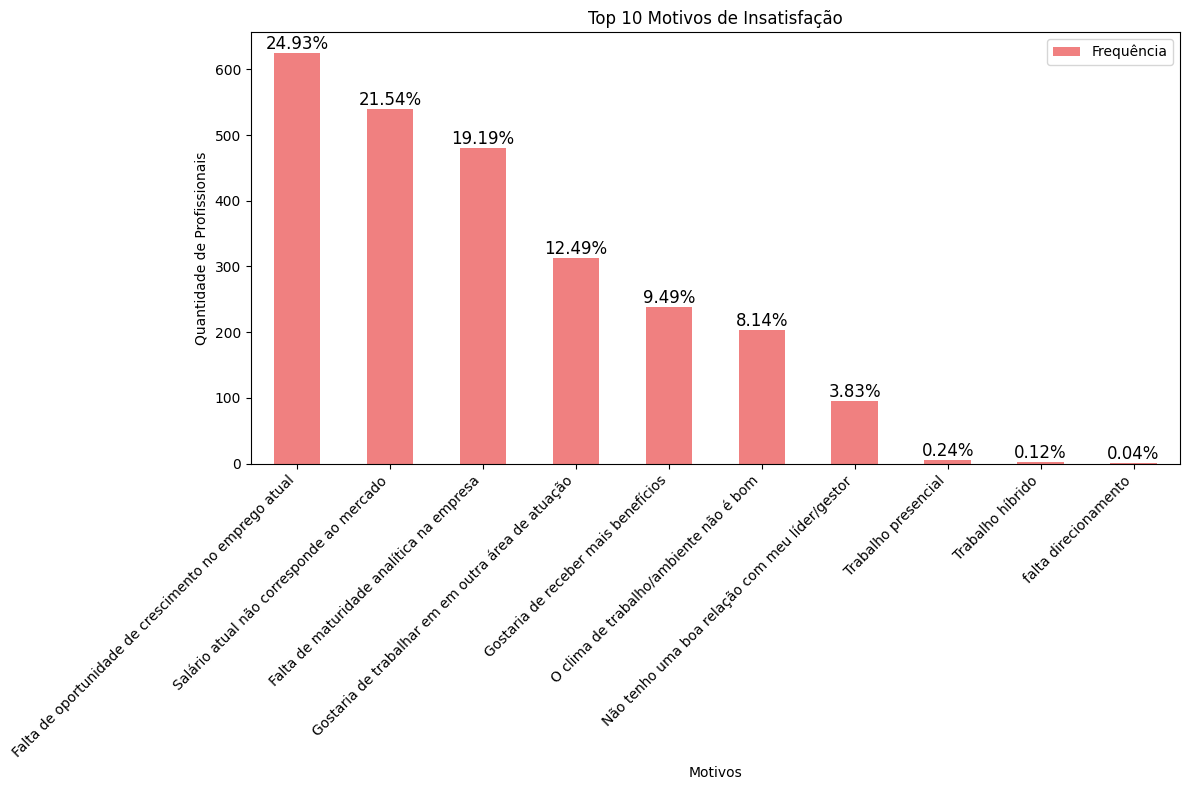

In [ ]:
satisfacao = dataset['Você está satisfeito na sua empresa atual?'].replace({1: 'Sim', 0: 'Não'})
insatisfacao_motivo = dataset['Qual o principal motivo da sua insatisfação com a empresa atual?']
#lista_motivos = []
for i in satisfacao.index:
    if satisfacao[i] == 'Não':
      conteudo = insatisfacao_motivo.dropna().str.split(',', expand=True).stack().str.strip()
      frequencia = conteudo.value_counts()
      top_10 = frequencia.head(10)
      total_respostas = top_10.sum()
      porcentagens = (top_10 / total_respostas * 100).round(2)


plt.figure(figsize=(12, 8))
top_10.plot(kind='bar', color='lightcoral', label='Frequência')

for i, (freq, perc) in enumerate(zip(top_10, porcentagens)):
    plt.text(i, freq, f'{perc}%', ha='center', va='bottom', fontsize=12)

plt.title('Top 10 Motivos de Insatisfação')
plt.xlabel('Motivos')
plt.ylabel('Quantidade de Profissionais')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

Entre os motivos de insatisfação, alguns padrões emergem que são cruciais para entender as causas subjacentes da descontentamento:

* Falta de Oportunidade de Crescimento no Emprego Atual (24.93%), Falta de Maturidade Analítica na Empresa (19.19%), O Clima de Trabalho/Ambiente Não é Bom (8.14%) e Não Tenho uma Boa Relação com Meu Líder/Gestor (3.83%): Estão relacionadas a falta de uma abordagem analítica madura dentro da empresa e que pode estar limitando a capacidade dos profissionais de aplicar e expandir suas habilidades de forma eficaz.

* Salário Atual Não Corresponde ao Mercado (21.54%) e Gostaria de Receber Mais Benefícios (9.49%): Mostra que a fator financeiro também tem grande impacto no grau de satisfação dos profissionais.

* Gostaria de Trabalhar em Outra Área de Atuação (12.49%): Apresenta os profissionais que estão buscando mudanças de carreira, também pode estar associada a outros fatores de insatisfação.

* Trabalho Presencial (0.24%), Trabalho Híbrido (0.12%) e Falta de Redirecionamento (0.04%): Esses fatores são mencionados com menos frequência, mas ainda representam preocupações menores para alguns.

O cenário revela uma divisão clara entre satisfação e insatisfação, com a maioria dos profissionais contentes, mas uma porção significativa expressando preocupações específicas.


###5. Quais são as principais ferramentas utilizadas?

Este gráfico mostra as cinco principais ferramentas de Business Intelligence (BI) usadas no dia a dia, com base na frequência de uso pelos usuários.
Essas ferramentas são utilizadas para transformar dados brutos em insights visuais que ajudam na tomada de decisões. O gráfico sugere que, enquanto algumas ferramentas, como o Power BI, são amplamente dominantes, há uma variedade de opções no mercado.


*   No eixo X (horizontal) as barras representam as ferramentas de BI mais utilizadas entre os profissionais:

  **Microsoft Power BI** lidera com **39,55%**, o que significa que quase 40% dos entrevistados preferem usar esta ferramenta. Isso se deve à sua popularidade no mercado, facilidade de uso e integração com outras ferramentas da Microsoft.

  **Não respondeu** aparece em segundo lugar com **27,35%**. Isso pode indicar que uma parcela significativa dos entrevistados não mencionou ou utiliza uma ferramenta não listada.

  **Tableau**, com **13,02%**.

  **Looker Studio** (anteriormente Google Data Studio) com **12,02%**, é uma plataforma mais acessível, especialmente para quem já está integrado ao ecossistema do Google.

  **Looker**, com **8,07%**.

*   No eixo Y (vertical) os **Números de Usuários**.



Top 5 ferramentas de BI utilizadas no dia a dia:
                                           Frequência  Porcentagem (%)
Microsoft PowerBI                                2069            39.55
Não respondeu                                    1431            27.35
Tableau                                           681            13.02
Looker Studio (antigo Google Data Studio)         629            12.02
Looker                                            422             8.07


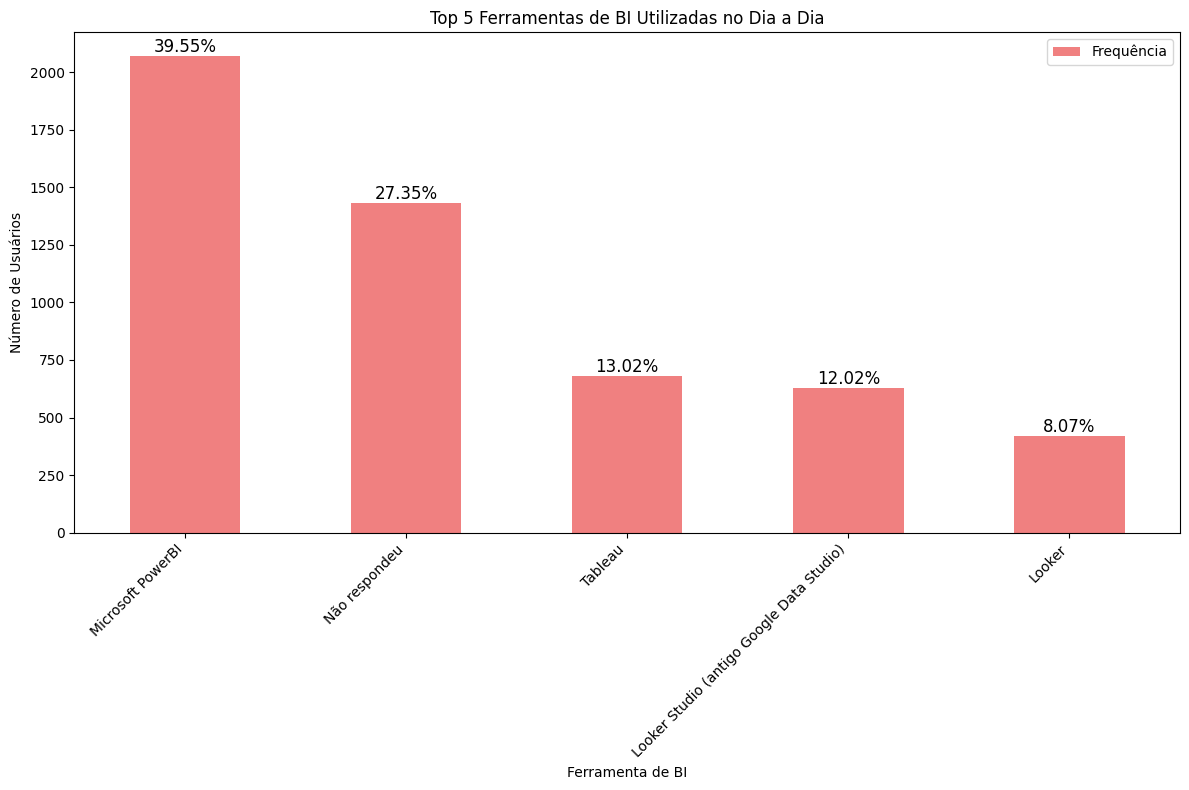

In [ ]:
# Nome da coluna a ser analisada
coluna_bi = 'Ferramenta de BI utilizada no dia a dia'

# Verificar a existência da coluna
if coluna_bi in dataset.columns:
    # Processar os dados da coluna
    def contar_frequencia_top_5(coluna):
        conteudo = dataset[coluna].dropna().str.split(',', expand=True).stack().str.strip()
        frequencias = conteudo.value_counts()
        top_5 = frequencias.head(5)
        return top_5

    # Obter as frequências das ferramentas de BI
    frequencias_bi = contar_frequencia_top_5(coluna_bi)

    # Calcular as porcentagens
    total_respostas = frequencias_bi.sum()
    porcentagens = (frequencias_bi / total_respostas * 100).round(2)

    # Criar DataFrame para visualização
    df_bi = pd.DataFrame({
        'Frequência': frequencias_bi,
        'Porcentagem (%)': porcentagens
    })

    # Exibir as 5 principais ferramentas de BI com porcentagens
    print("Top 5 ferramentas de BI utilizadas no dia a dia:")
    print(df_bi)

    plt.figure(figsize=(12, 8))
    df_bi['Frequência'].plot(kind='bar', color='lightcoral', label='Frequência')

    for i, (freq, perc) in enumerate(zip(df_bi['Frequência'], df_bi['Porcentagem (%)'])):
        plt.text(i, freq, f'{perc}%', ha='center', va='bottom', fontsize=12)

    plt.title('Top 5 Ferramentas de BI Utilizadas no Dia a Dia')
    plt.xlabel('Ferramenta de BI')
    plt.ylabel('Número de Usuários')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend()
    plt.show()
else:
    print(f"Coluna '{coluna_bi}' não encontrada no DataFrame.")

Vamos explicar as informações do gráfico sobre as linguagens mais utilizadas no trabalho. Optamos por realizar um top 5 entre as liguagens mais relevantes e utilizadas pelos profissionais de tecnologia.


*   O eixo X (horizontal) representa as 5 linguagens principais:

  **SQL**: A primeira barra representa o SQL, que é utilizado por **38,65%** dos profissionais.

  **Python**: Logo em seguida, vemos o Python, utilizado por **34,60%** dos usuários.

  **Não respondeu**: Esta barra representa a porcentagem de pessoas que não responderam à pesquisa sobre as linguagens que usam, o que equivale a **18,16%** dos entrevistados.

  **R**: O R aparece como a quarta opção mais utilizada, com **4,95%.**
  
  **Não utilizo nenhuma das linguagens listadas:** A última barra mostra **3,64%** de pessoas que usam outras linguagens não listadas ou que não utilizam nenhuma das mencionadas no gráfico.


*   O eixo Y (vertical) mostra o Número de Usuários.




Top 5 linguagens utilizadas no trabalho:
                                             Frequência  Porcentagem (%)
SQL                                                3046            38.65
Python                                             2727            34.60
Não respondeu                                      1431            18.16
R                                                   390             4.95
Não utilizo nenhuma das linguagens listadas         287             3.64


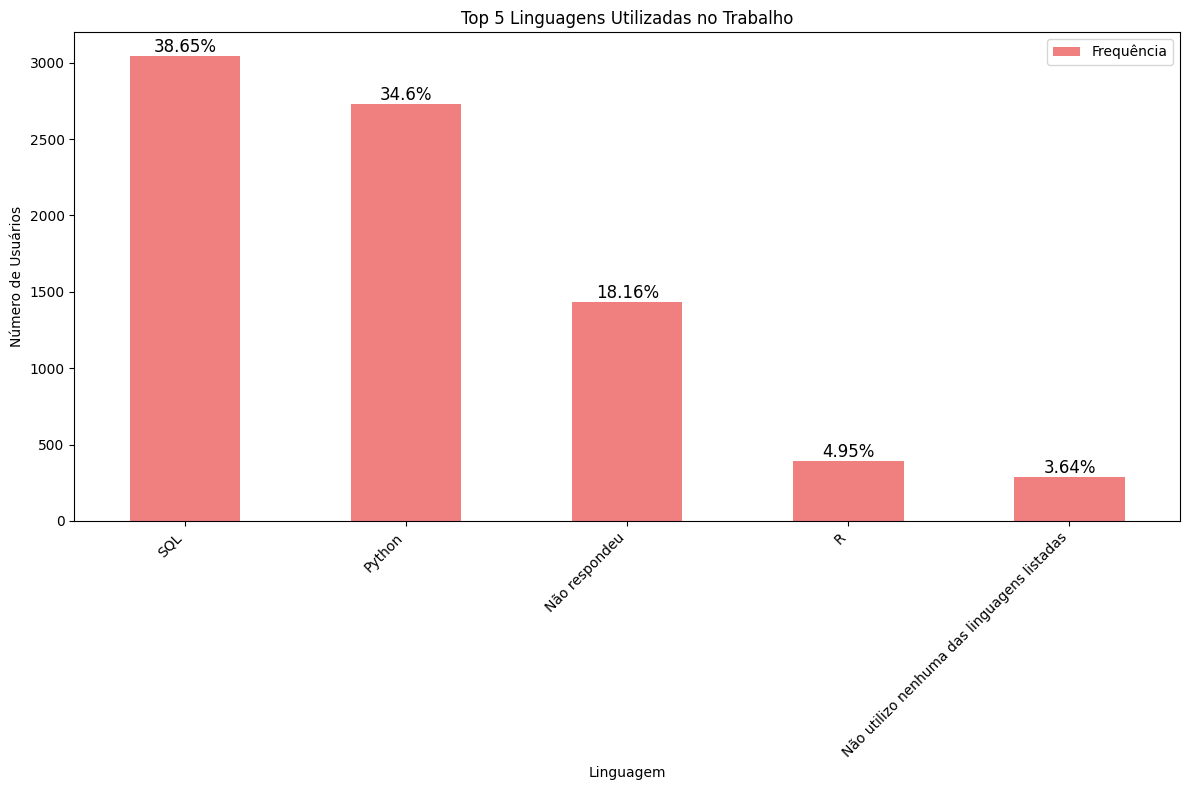

In [ ]:
# Nome da coluna a ser analisada
coluna_linguagens = 'Quais das linguagens listadas abaixo você utiliza no trabalho?'

# Verificar a existência da coluna
if coluna_linguagens in dataset.columns:
    # Processar os dados da coluna
    def contar_frequencia_top_5(coluna):
        # Separar valores múltiplos e contar a frequência
        conteudo = dataset[coluna].dropna().str.split(',', expand=True).stack().str.strip()
        frequencias = conteudo.value_counts()
        top_5 = frequencias.head(5)  # Limitar a 5 principais
        return top_5

    # Obter as frequências das linguagens utilizadas
    frequencias_linguagens = contar_frequencia_top_5(coluna_linguagens)

    # Calcular as porcentagens
    total_respostas = frequencias_linguagens.sum()
    porcentagens = (frequencias_linguagens / total_respostas * 100).round(2)

    # Criar DataFrame para visualização
    df_linguagens = pd.DataFrame({
        'Frequência': frequencias_linguagens,
        'Porcentagem (%)': porcentagens
    })

    # Exibir as 5 principais linguagens com porcentagens
    print("Top 5 linguagens utilizadas no trabalho:")
    print(df_linguagens)

    plt.figure(figsize=(12, 8))
    df_linguagens['Frequência'].plot(kind='bar', color='lightcoral', label='Frequência')

    for i, (freq, perc) in enumerate(zip(df_linguagens['Frequência'], df_linguagens['Porcentagem (%)'])):
        plt.text(i, freq, f'{perc}%', ha='center', va='bottom', fontsize=12)

    plt.title('Top 5 Linguagens Utilizadas no Trabalho')
    plt.xlabel('Linguagem')
    plt.ylabel('Número de Usuários')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend()
    plt.show()
else:
    print(f"Coluna '{coluna_linguagens}' não encontrada no DataFrame.")

**Conclusão:**

 Análises não apenas ilustram padrões e tendências de mercado, mas também tornam as descobertas mais acessíveis e compreensíveis para diferentes públicos, incluindo stakeholders e tomadores de decisão. A partir desses insights, o relatório fornece recomendações estratégicas para profissionais e organizações que atuam ou desejam atuar no setor de dados, contribuindo para uma melhor compreensão do panorama atual e futuro deste mercado no Brasil.

#**Parte 2: Se aprofundando no mercado de trabalho**

##**Cenário das mulheres no mercado de trabalho**

###**Introdução**

Na busca por compreender a participação das mulheres em diferentes aspectos do mercado de dados, foram propostas análises com o objetivo de contribuir para o desafio final do bootcamp. O foco no trabalho feminino visa fomentar o debate sobre essas profissionais, incentivando reflexões que podem desempenhar um papel crucial no acompanhamento da evolução delas no setor de dados.

###Dados de interesse

In [ ]:
mulheres = dataset[(dataset['Genero']=='Feminino')]
mulheres.head(3)

,Idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Faixa salarial,Nivel,Gestor?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Quais das linguagens listadas abaixo você utiliza no trabalho?,Ferramenta de BI utilizada no dia a dia,Salario minimo,Salario maximo,Salario medio
2,37,Feminino,Amarela,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de R$ 6.001/mês a R$ 8.000/mês,Júnior,0.0,1.0,NaN,"SQL, Python, SAS/Stata","Salesforce/Einstein Analytics, Amazon Quicksig...",6001.0,8000.0,7000.5
11,46,Feminino,Parda,Não,Nordeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,NaN,Não respondeu,0.0,1.0,NaN,Não respondeu,Não respondeu,8001.0,12000.0,10000.5
12,32,Feminino,Preta,Não,Sul,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,de R$ 3.001/mês a R$ 4.000/mês,Pleno,0.0,1.0,NaN,"R, Não utilizo nenhuma das linguagens listadas",Microsoft PowerBI,3001.0,4000.0,3500.5


**Observações:**


*   Este novo dataframe filtra principalmente o gênero definido como feminino, porém, investigações de outros gêneros foram realizadas no decorrer da análise; e
*   Nem todas as colunas foram utilizadas durante esta segunda análise.



###Quantidade de Mulheres por nível de experiência

A análise sobre a distribuição das mulheres nos diferentes níveis de cargo revela uma participação significativa em todos os estágios da carreira, desde posições Júnior até Sênior. Para isso, realize-se um agrupamento por nível seguida da contagem por gênero feminino para constatação desse cenário.

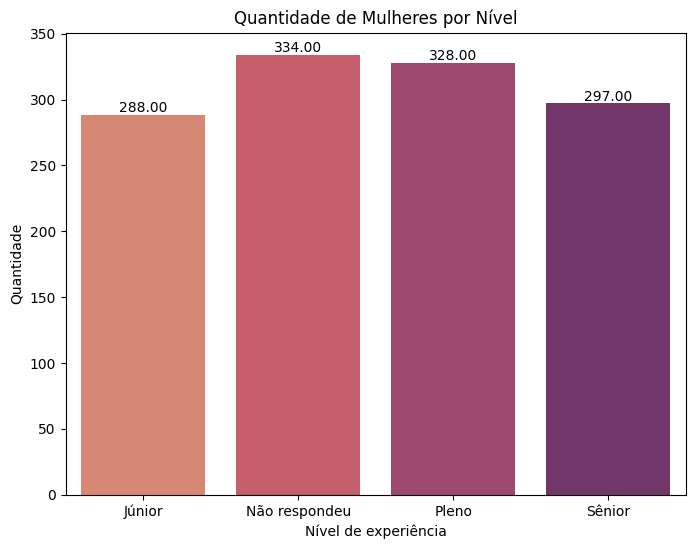

In [ ]:
#Relação entre mulheres e o nível
mulheres_salario = mulheres.groupby('Nivel')['Genero'].count().reset_index()
mulheres_salario.columns = ['Nivel', 'Quantidade']

plt.figure(figsize=(8,6))
grafico = sns.barplot(x='Nivel', y = 'Quantidade', data=mulheres_salario, palette='flare')
plt.title('Quantidade de Mulheres por Nível')
plt.xlabel('Nível de experiência')
plt.ylabel('Quantidade')

legenda_quant(grafico)

plt.show()

Foi observado:

* O nível "Não respondeu" aparece com a maior quantidade de mulheres (334), seguido de perto pelo nível Pleno (328);
* Em terceiro lugar, temos o nível Sênior com 297 mulheres, e o nível Júnior aparece em quarto com 288 mulheres;
* A distribuição de mulheres em posições de diferentes níveis profissionais é relativamente equilibrada; e
* A maior quantidade é a de "Não respondeu", o que pode levantar questões sobre por que tantas mulheres não identificaram o seu nível. Isso pode ser um indício de uma falta de clareza na definição dos níveis ou uma relutância em compartilhar essa informação.

###Quantidade de Mulheres no cargo de gestor

A análise da ocupação de cargos de gestão por mulheres nos revela um cenário desafiador em termos de representatividade feminina em posições de liderança. Para tal, realiza-se o agrupamento por cargo de gestor, seguida pela contagem do gênero feminino para análise desse cenário.

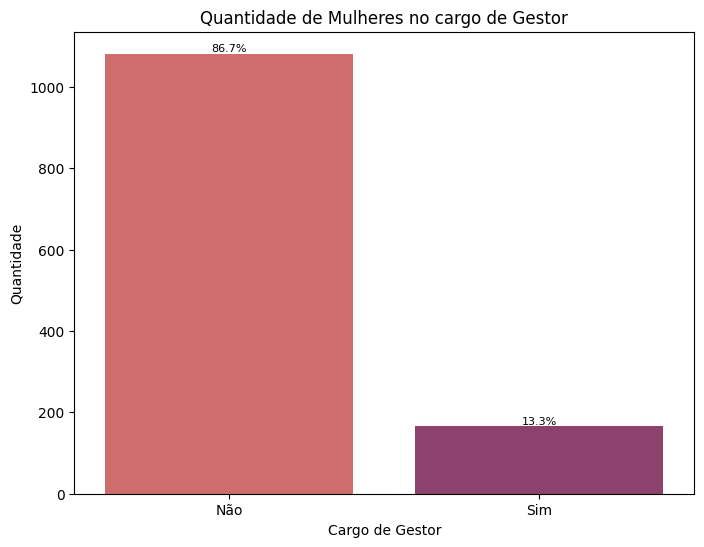

In [ ]:
# Quantas mulheres são gestoras?

mulheres_gestoras = mulheres.groupby('Gestor?')['Genero'].count().reset_index()
mulheres_gestoras.columns = ['Gestor?', 'Quantidade']

mulheres_gestoras = mulheres_gestoras.replace({1: 'Sim', 0: 'Não'})

# Gráfico
plt.figure(figsize=(8,6))
grafico = sns.barplot(x='Gestor?', y = 'Quantidade', data=mulheres_gestoras, palette='flare')
plt.title('Quantidade de Mulheres no cargo de Gestor')
plt.xlabel('Cargo de Gestor')
plt.ylabel('Quantidade')

legenda_porc(grafico)

plt.show()

Foi observado:
* A grande maioria das mulheres, cerca de 86,7%, não ocupa cargos de gestão, representando uma quantidade acima de 1000 mulheres;

* Apenas 13,3% das mulheres estão em cargos de gestão, em torno de 150-200 mulheres, o que reflete uma sub-representação significativa nos níveis de liderança; e

* Isso sugere que, mesmo que a presença feminina seja relevante na organização ou setor, há barreiras significativas para a progressão de carreira rumo a cargos de liderança.

###Origem das profissionais da área de dados

A análise sobre a origem de formação das mulheres na área de dados nos mostra um panorama interessante sobre a diversidade acadêmica. Para isso, realiza-se o agrupamento área de formação, seguida pela contagem do gênero feminino para averiguação deste cenário.

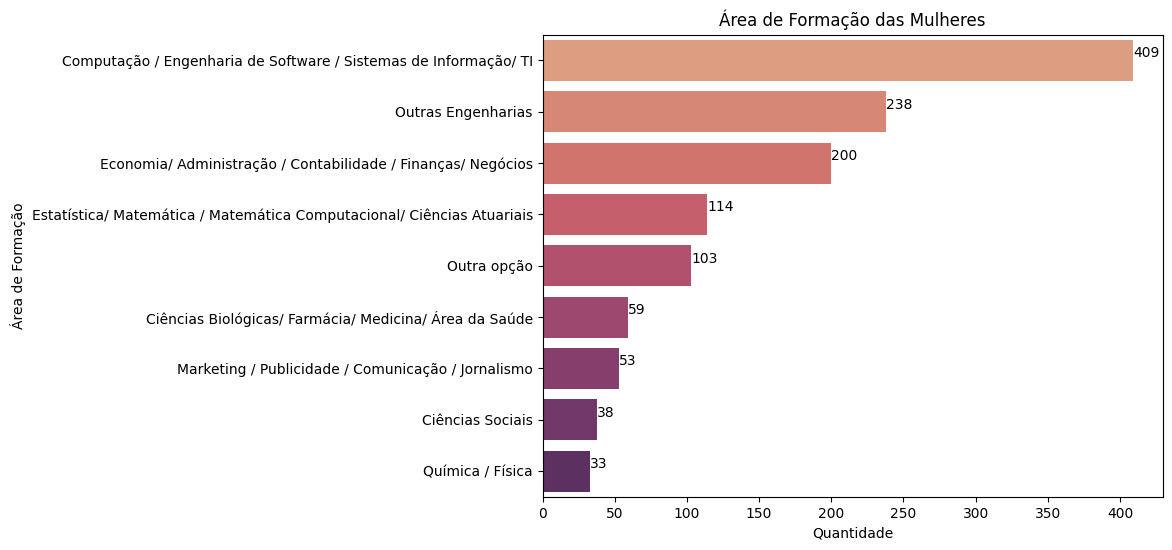

In [ ]:
# Área de formação das mulheres

mulheres_area = mulheres.groupby('Área de Formação')['Genero'].count().reset_index()
mulheres_area.columns = ['Área de Formação', 'Quantidade']
mulheres_area = mulheres_area.sort_values(by='Quantidade', ascending=False)

# Gráfico

plt.figure(figsize=(8,6))
grafico = sns.barplot(x='Quantidade', y = 'Área de Formação', data=mulheres_area, palette='flare')
plt.title('Área de Formação das Mulheres')
plt.xlabel('Quantidade')
plt.ylabel('Área de Formação')

for p in grafico.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width
    y = p.get_y() + height / 2

    plt.text(x, y, f'{width:.0f}', ha='left', va='bottom')

plt.show()

Foi observado:

* A maior parte das mulheres tem formação em Computação / Engenharia de Software / Sistemas de Informação / TI, com 409 mulheres. Este dado reflete a crescente presença feminina no setor de tecnologia, uma área que historicamente tinha uma maior representação masculina;

* A segunda maior área de formação são as Outras Engenharias, com 238 mulheres, seguida de perto por áreas de Economia / Administração / Contabilidade / Finanças / Negócios, com 200 mulheres. Isso indica que, além da tecnologia, há uma presença significativa de mulheres em carreiras técnicas e de negócios;


* Áreas como Ciências Sociais e Química / Física têm uma menor participação, com 38 e 33 mulheres, respectivamente, destacando áreas que, aparentemente, atraem um número menor de mulheres.

###Média de remuneração por regiões do Brasil

A análise da remuneração por gênero e por região no Brasil nos revela sobre discrepâncias salariais no setor de dados, refletindo características econômicas regionais. Para tal, realiza-se o agrupamento por região onde mora, seguindos pela média do salário para averiguação deste cenário.


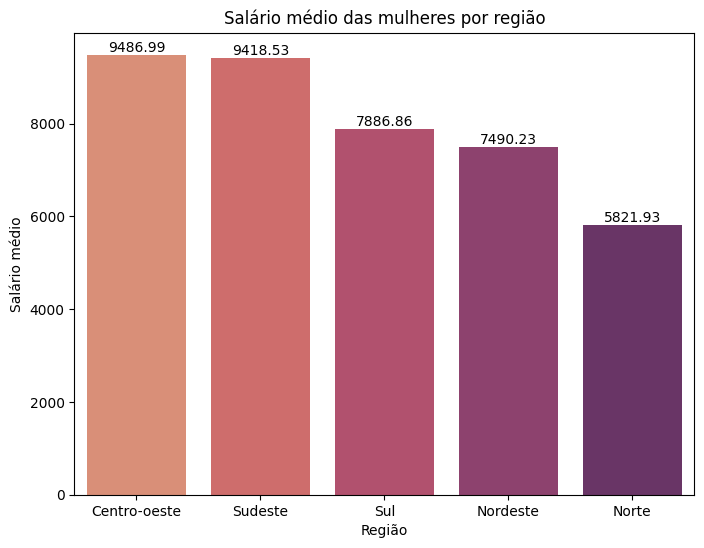

In [ ]:
# Salario recebido por região entre as mulheres

mulheres_salario_regiao = mulheres.groupby('Regiao onde mora')['Salario medio'].mean().reset_index()
mulheres_salario_regiao.columns = ['Regiao onde mora', 'Salario medio']
mulheres_salario_regiao = round(mulheres_salario_regiao.sort_values(by='Salario medio', ascending=False), 2)
mulheres_salario_regiao


# Gráfico
plt.figure(figsize=(8,6))
grafico = sns.barplot(x='Regiao onde mora', y='Salario medio', data=mulheres_salario_regiao, palette='flare')
plt.title('Salário médio das mulheres por região')
plt.xlabel('Região')
plt.ylabel('Salário médio')

legenda_quant(grafico)

plt.show()

Foi observado:
* Regiões Centro-Oeste e Sudeste apresentam as maiores médias salariais para as mulheres nas áreas de dados. A combinação de industrialização, baixo desemprego e investimentos regionais contribui para os salários mais altos nestas regiões.

* A região Norte apresenta a menor média salarial do país. Fatores como economia, infraestrutura, desigualdade e a dinâmica da região podem contribuir para os salários mais baixos na região Norte.

Como este resultados são abaixo da média salárial observada na parte 1, vamos analisar novamente os dados sobre os salários médios, agora avaliando os resultados entre gêneros em diferentes regiões do Brasil:

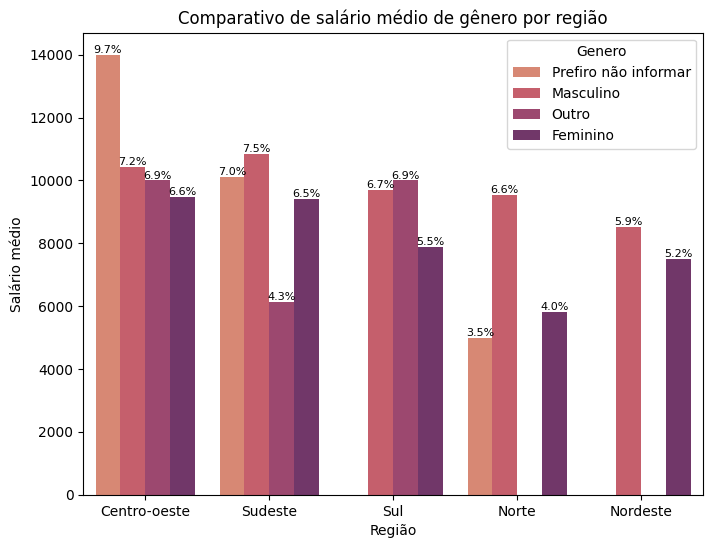

In [ ]:
# Salario recebido por região entre as mulheres

salario_regiao = dataset.groupby(['Genero', 'Regiao onde mora']).agg({'Salario medio':'mean'}).reset_index()
salario_regiao.columns = ['Genero','Regiao onde mora', 'Salario medio']
salario_regiao = round(salario_regiao.sort_values(by='Salario medio', ascending=False), 2)
salario_regiao


# Gráfico
plt.figure(figsize=(8,6))
grafico = sns.barplot( data=salario_regiao, x='Regiao onde mora', y='Salario medio', hue='Genero', palette='flare')
plt.title('Comparativo de salário médio de gênero por região')
plt.xlabel('Região')
plt.ylabel('Salário médio')

legenda_porc(grafico)

plt.show()

Foi observado:

* Na região Centro-Oeste, os homens têm um salário médio mais alto do que as mulheres. A diferença é de aproximadamente 9,7%, com os homens ganhando mais;

* A região Norte apresenta a menor diferença salarial entre gêneros, mas ainda é relevante. Os homens ganham cerca de 4,3% a mais; e

* Houve uma porcentagem de pessoas que escolheram não declarar ou não se encaixavam nos padrões de gênero. Pode ser uma escolha consciente para evitar estereótipos ou preconceitos.

###Nível de ensino por gênero

Diferente das outras análises, ao analisarmos todas as identidades presentes no dataset original, podemos enxergar com mais clareza as disparidades entre gêneros, como observados na análise anterior. Para tal, realizamos um agrupamento de gênero e nível de ensino para observação desse cenário.

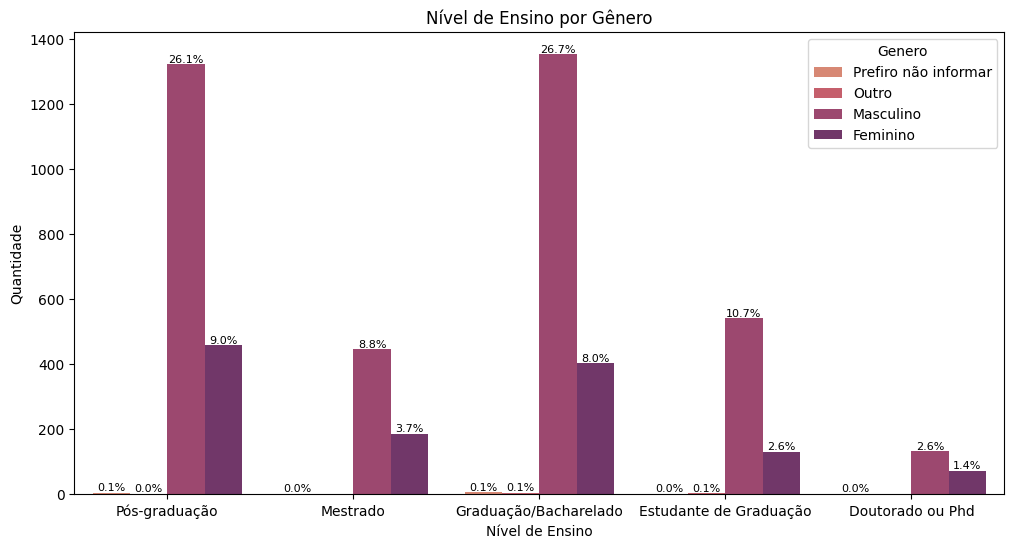

In [ ]:
# Nivel de ensino das mulheres

ensino = dataset.groupby(['Genero', 'Nivel de Ensino']).size().reset_index(name='count')
ensino.columns = ['Genero','Nivel de Ensino', 'Quantidade']
ensino = ensino.sort_values(by='Genero', ascending=False)

# Gráfico
plt.figure(figsize=(12,6))
grafico = sns.barplot(x='Nivel de Ensino', y='Quantidade', data=ensino, hue = 'Genero', palette='flare')
plt.title('Nível de Ensino por Gênero')
plt.xlabel('Nível de Ensino')
plt.ylabel('Quantidade')

legenda_porc(grafico)

plt.show()

Foi observado:

* Há uma evidente predominância do gênero masculino;

* As mulheres estão presentes em todos os níveis de ensino, embora em uma proporção menor, ainda há uma presença significativa de mulheres em programas de pós-graduação. Isso indica que as mulheres também estão investindo em educação avançada, como especializações;

* Em segundo lugar está a proporção mulheres está no nível de graduação/bacharelado. Isso sugere que as mulheres estão buscando educação superior e se formando em cursos de graduação; e

* A categoria “Outro” e “Prefiro não informar” representam uma proporção menor em comparação com os gêneros masculino e feminino. Isso pode indicar uma baixa representatividade de outros gêneros, sugerindo que o campo acadêmico ainda é fortemente marcado pelas divisões tradicionais de gênero.

###**Conclusão**

A análise da participação feminina em diferentes contextos profissionais revela um cenário de crescente diversidade, mas também aponta para desafios persistentes na equidade de gênero, especialmente em cargos de liderança.

Observa-se que **as mulheres estão cada vez mais presentes em áreas historicamente dominadas por homens**, como Tecnologia da Informação e Engenharia, com um número significativo de profissionais em carreiras técnicas e analíticas. Esse avanço demonstra a quebra de barreiras e a maior aceitação das mulheres em áreas que exigem forte base em ciência, tecnologia, engenharia e matemática. Além disso, há uma presença notável em **economia, administração e negócios**, áreas que tradicionalmente oferecem oportunidades para ascensão a cargos estratégicos.

No entanto, o gráfico sobre a presença de mulheres em **cargos de gestão** revela uma discrepância preocupante: apenas **13,3%** das mulheres ocupam posições de liderança, enquanto a grande maioria ainda está em funções não-gerenciais.

Esse dado destaca a necessidade de políticas mais inclusivas e práticas de promoção interna que favoreçam o desenvolvimento de carreiras femininas até os níveis de decisão e liderança.

Além disso, a análise mostra que há uma **distribuição equilibrada das mulheres em diferentes níveis de experiência profissional**, sugerindo que a força de trabalho feminina está presente em várias camadas da organização. No entanto, há espaço para maior transparência e incentivo ao compartilhamento de informações, como indicado pelo alto número de respostas de "não respondeu" sobre o nível profissional.

Ao analisar as médias salariais por regiões do Brasil e por gênero, observa-se que as Regiões Centro-Oeste e Sudeste apresentam os maiores salários para mulheres nas áreas de dados. No entanto, ao comparar os salários entre gêneros, identificou-se que, na Região Centro-Oeste, os homens ganham em média 9,7% a mais do que as mulheres. Curiosamente, na Região Norte, embora os salários sejam os mais baixos, a diferença salarial entre homens e mulheres é a menor do país, com os homens ganhando cerca de 4,3% a mais.

Por fim, no âmbito educacional, as mulheres estão presentes em todos os níveis de ensino, embora em uma proporção menor. Contudo, a maioria das mulheres ainda se concentra em cursos de graduação/bacharelado e pós-graduação, sugerindo um foco predominante na formação superior de nível inicial, seguida por especialização.

**Em resumo**, embora as mulheres tenham conquistado um espaço importante em várias áreas profissionais, ainda existem barreiras claras à equidade, especialmente em relação à ocupação de cargos de liderança e à representatividade em certos campos de atuação. É fundamental que as organizações adotem estratégias mais inclusivas para que as mulheres possam não apenas ingressar, mas também prosperar e liderar em suas respectivas áreas de atuação.

#**Documentação**

* [Seaborn](https://seaborn.pydata.org/index.html)
* [Pandas](https://pandas.pydata.org/docs/index.*html*)